In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('Catalogues/allpop_NGC5822_GMM2.csv')
df

,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,226.540876,-56.317251,-7.561,-3.855,20.414282,2.432413,1.2212,0
1,226.461549,-56.340141,-8.144,-5.034,19.798546,2.668852,1.1586,4
2,226.398137,-56.335672,-6.523,-7.522,18.668010,2.334206,1.2869,4
3,226.444518,-56.302906,-6.309,-5.284,18.936375,2.499495,1.1082,4
4,226.499912,-56.285531,-6.309,-4.976,20.484121,2.000231,1.1275,4
...,...,...,...,...,...,...,...,...
14592,226.429106,-52.427262,-5.960,-6.230,20.341524,1.651640,1.2397,4
14593,226.412152,-52.414070,-8.942,-5.031,20.426191,1.542767,1.1744,2
14594,226.362966,-52.402928,-8.500,-5.627,20.185804,1.750360,1.1699,4
14595,226.571315,-52.390856,-5.840,-6.054,19.183874,2.169256,1.1524,4


In [12]:
df['cluster'].value_counts()

cluster
4    3681
0    3590
2    2962
1    2234
3    2130
Name: count, dtype: int64

In [3]:
cluster_escolhido = 1  # Exemplo: queremos detectar o cluster 2
df['target'] = (df['cluster'] == cluster_escolhido).astype(int)

In [4]:
X = df.drop(columns=['cluster', 'target'])  # Apenas as variáveis de entrada
y = df['target']  # Rótulo binário

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Ajustando hiperparâmetros
modelo_rf = RandomForestClassifier(n_estimators=500, max_depth=5, min_samples_split=300, class_weight='balanced', random_state=60)

# Treinar o modelo
modelo_rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = modelo_rf.predict(X_test)

# Avaliar com precision, recall e F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3760
           1       0.62      0.94      0.75       620

    accuracy                           0.91      4380
   macro avg       0.81      0.92      0.85      4380
weighted avg       0.94      0.91      0.92      4380



In [8]:
a1 = df[df["target"]==1]
a2 = df[df["target"]==0]

In [9]:
print(df["target"].value_counts())

target
0    12363
1     2234
Name: count, dtype: int64


/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Gmag (mag)')

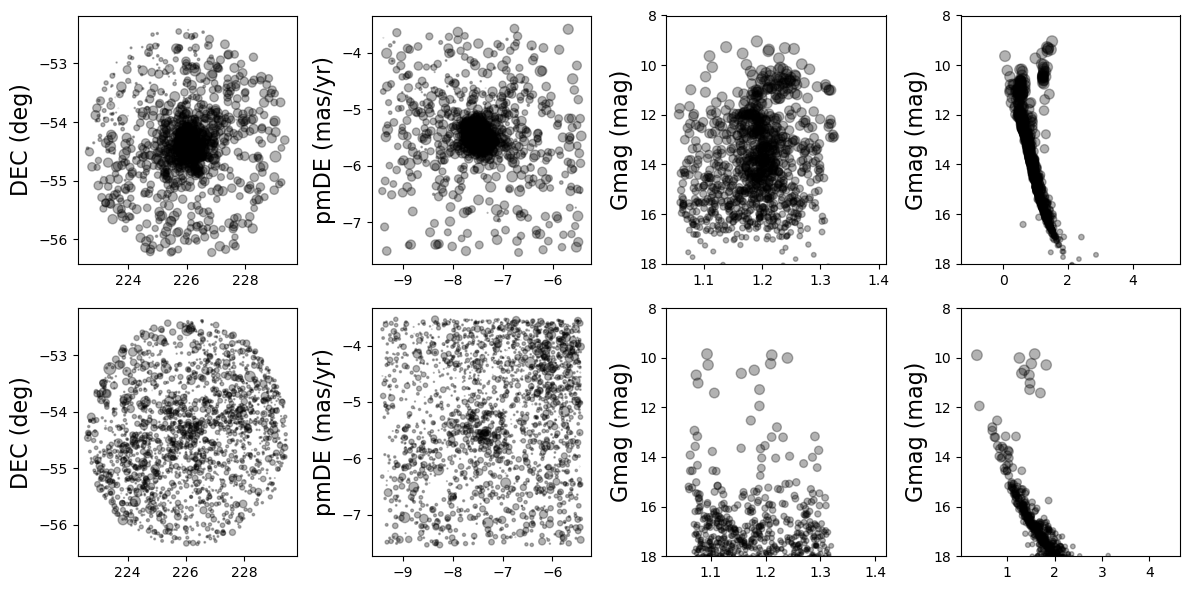

In [10]:
fig,ax = plt.subplots(2,4, figsize=(12,6),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

In [12]:
print(y_train.value_counts())

target
0    10395
1      520
Name: count, dtype: int64


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = modelo.predict(X_test)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Matriz de Confusão:
[[2301    1]
 [  17  107]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2302
           1       0.99      0.86      0.92       124

    accuracy                           0.99      2426
   macro avg       0.99      0.93      0.96      2426
weighted avg       0.99      0.99      0.99      2426



In [60]:
a1 = df[df["target"]==1]
a2 = df[df["target"]==0]

In [61]:
print(df["target"].value_counts())

target
0    11546
1      582
Name: count, dtype: int64


AttributeError: 'DataFrame' object has no attribute 'Gmag'

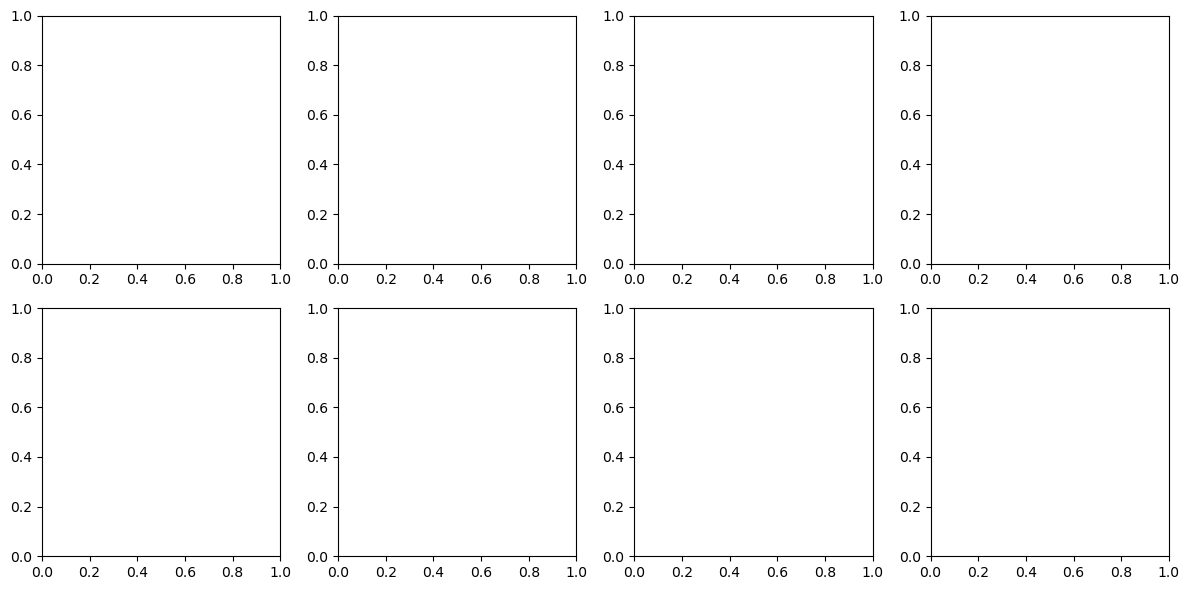

In [62]:
fig,ax = plt.subplots(2,4, figsize=(12,6),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)